In [1]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 
import re
from wordcloud import WordCloud

In [9]:
df=pd.read_csv("/kaggle/input/ai-generated-essays-dataset/AI Generated Essays Dataset.csv")
df.head(10)

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1
5,"Calculus, a cornerstone of mathematical explor...",1
6,"Electronics, the backbone of modern technology...",1
7,"Data Science, a multidisciplinary field at the...",1
8,"Artificial Intelligence (AI), a branch of comp...",1
9,"Laptops, compact and portable computing device...",1


In [12]:
df[df['generated'] == 0]

,text,generated
82,Cars. Cars have been around since they became ...,0
83,Transportation is a large necessity in most co...,0
84,"""America's love affair with it's vehicles seem...",0
85,How often do you ride in a car? Do you drive a...,0
86,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
1455,There has been a fuss about the Elector Colleg...,0
1456,Limiting car usage has many advantages. Such a...,0
1457,There's a new trend that has been developing f...,0
1458,As we all know cars are a big part of our soci...,0


In [13]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # в нижний регистр
        text = re.sub(r'[^a-z\s]', ' ', text)  # только буквы и пробелы
        text = re.sub(r'\s+', ' ', text).strip()  # лишние пробелы → один
        # Убираем стоп-слова
        words = text.split()
        text = ' '.join([word for word in words if word not in stop_words])
    return text

# Применяем
df['cleaned_text'] = df['text'].apply(clean_text)

# Проверка
df[['text', 'cleaned_text']].head(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,"Machine learning, a subset of artificial intel...",machine learning subset artificial intelligenc...
1,"A decision tree, a prominent machine learning ...",decision tree prominent machine learning algor...


In [15]:
df = df.drop('text', axis=1)
df.rename(columns={'cleaned_text': 'text'}, inplace=True)
df

,generated,text
0,1,machine learning subset artificial intelligenc...
1,1,decision tree prominent machine learning algor...
2,1,education cornerstone societal progress extend...
3,1,computers backbone modern technology revolutio...
4,1,chess timeless game strategy intellect transce...
...,...,...
1455,0,fuss elector college many people get confused ...
1456,0,limiting car usage many advantages putting lot...
1457,0,new trend developing years soon full throttle ...
1458,0,know cars big part society today however cars ...


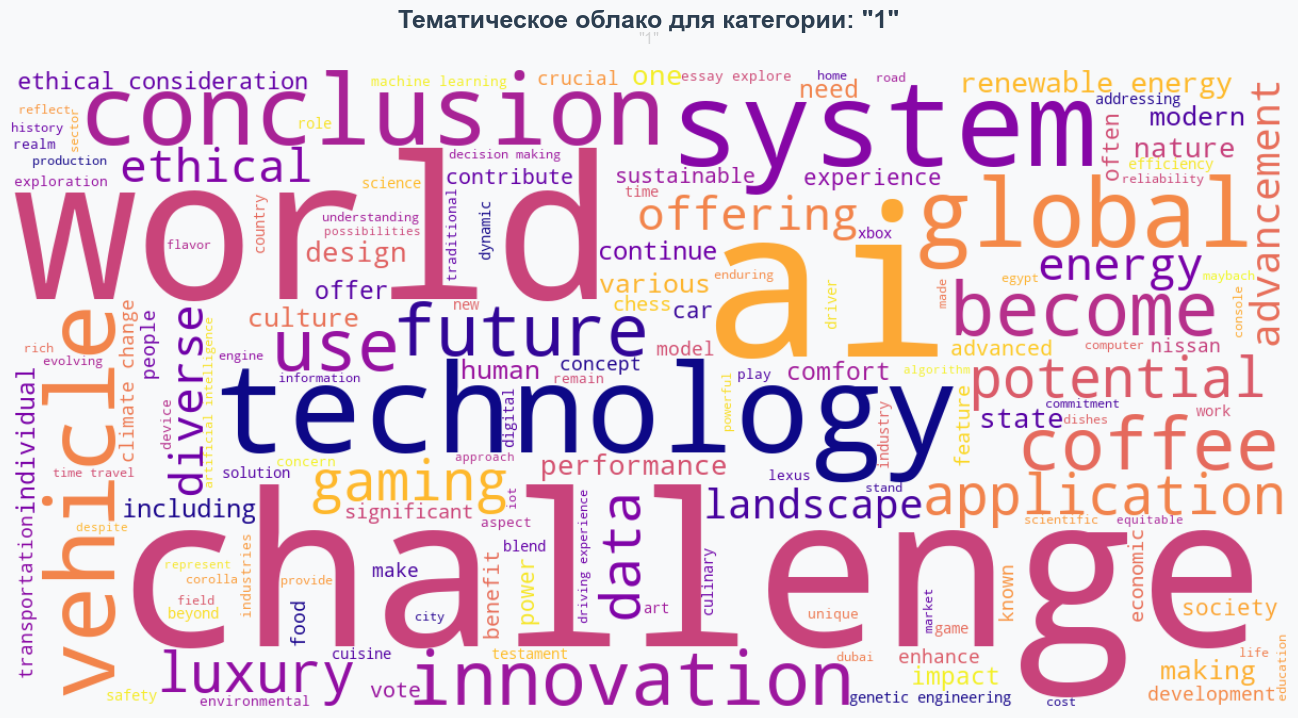

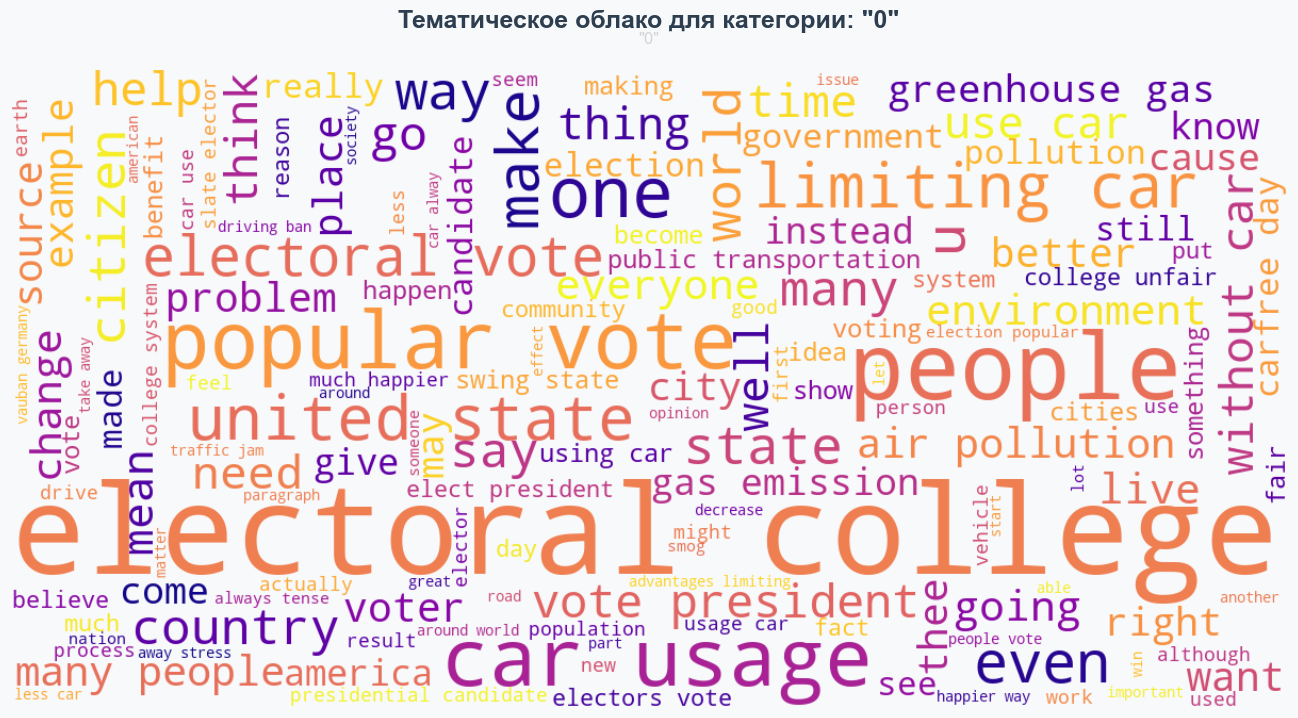

In [18]:

plt.style.use('seaborn-v0_8-whitegrid')  #

for label in df['generated'].unique():
    # Подготовка текста
    text = " ".join(df[df['generated'] == label]['text'])
    
    # Создание красивого WordCloud
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='#f8f9fa',  # Светло-серый фон
        colormap='plasma',           # Яркая цветовая схема (можно заменить на 'viridis', 'magma' и др.)
        max_words=150,
        contour_width=2,
        contour_color='steelblue',
        prefer_horizontal=0.8,       # Больше вертикальных слов
        min_font_size=8,
        max_font_size=200,
        relative_scaling=0.5         # Разнообразие размеров слов
    ).generate(text)
    
    # Визуализация с улучшенным оформлением
    plt.figure(figsize=(14, 7), facecolor='#f8f9fa')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    # Красивое название
    plt.title(
        f'Тематическое облако для категории: "{label}"',
        fontsize=18,
        pad=30,
        color='#2c3e50',
        fontweight='bold'
    )
    
    # Добавляем легкую тень для текста заголовка
    plt.text(
        0.5, 0.95,
        f'"{label}"',
        transform=plt.gcf().transFigure,
        ha='center',
        fontsize=12,
        color='gray',
        alpha=0.3
    )
    
    plt.tight_layout(pad=0)
    plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
x=df["text"]
y=df["generated"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=9)
vect=TfidfVectorizer()
X_train_v=vect.fit_transform(X_train)
X_test_v=vect.transform(X_test)

In [28]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter


print("До resample:", Counter(y_train))


count_1 = (y_train == 1).sum()
sampling_strategy = {1: count_1 * 2} 

ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_v, y_train)


print("После resample:", Counter(y_train_resampled))


model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test_v)

# Оценка
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

До resample: Counter({0: 1099, 1: 69})
После resample: Counter({0: 1099, 1: 138})

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00        16

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

